In [2]:
# importing Qiskit
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from qiskit.visualization import plot_histogram

In [3]:
# Problem-specific
switching2x2 = {
    0: [0, 1, 2],
    1: [0, 1, 3],
    2: [0, 2, 3],
    3: [1, 2, 3],
}

In [4]:
def init(x):
    n = int(len(x)**(1/2))
    f_in = QuantumRegister(len(x), name='x')
    f_out = QuantumRegister(len(x), name='y')
    f_oracle = QuantumRegister(1, name='o')
    f_res = ClassicalRegister(len(x), name='c')
    f = []
    f.append(f_in)
    f.append(f_out)
    f.append(f_oracle)
    f.append(f_res)
    cq = QuantumCircuit(f_in, f_out, f_oracle, f_res) 
    cq.x(f_oracle)
    cq.h(f_oracle)
    for i in range(len(x)):
        if x[i]:
            cq.x(i)
    cq.h(f_out)
    cq.barrier()
    return cq, f

def function(cq, f):
    for n, lights in switching2x2.items():
        for i in lights:
            cq.cx(f[1][i],f[0][n])
    cq.barrier()
    return cq
    
def oracle(cq, f):
    cq.x(f[0])
    cq.mcx(f[0], f[2])
    cq.x(f[0])
    cq.barrier()
    return cq
    
def diffusion(cq, f):
    cq.h(f[1])
    cq.x(f[1])
    cq.h(f[1][3])
    cq.mcx(f[1][0:-1], f[1][3])
    cq.h(f[1][3])
    cq.x(f[1])
    cq.h(f[1])
    cq.barrier()
    return cq


def lightsout_iter(cq,f):
    cq = function(cq,f)
    cq = oracle(cq,f)
    cq = function(cq,f)
    cq = diffusion(cq,f)
    return cq
    
def lightsout_cq(x):
    cq, f = init(x)
    for i in range(1):
        cq = lightsout_iter(cq,f)
    cq.h(f[2])
    cq.x(f[2])
    cq.barrier()
    cq.measure(f[1],f[3])
    return cq

Figure(2209.35x1789.28)


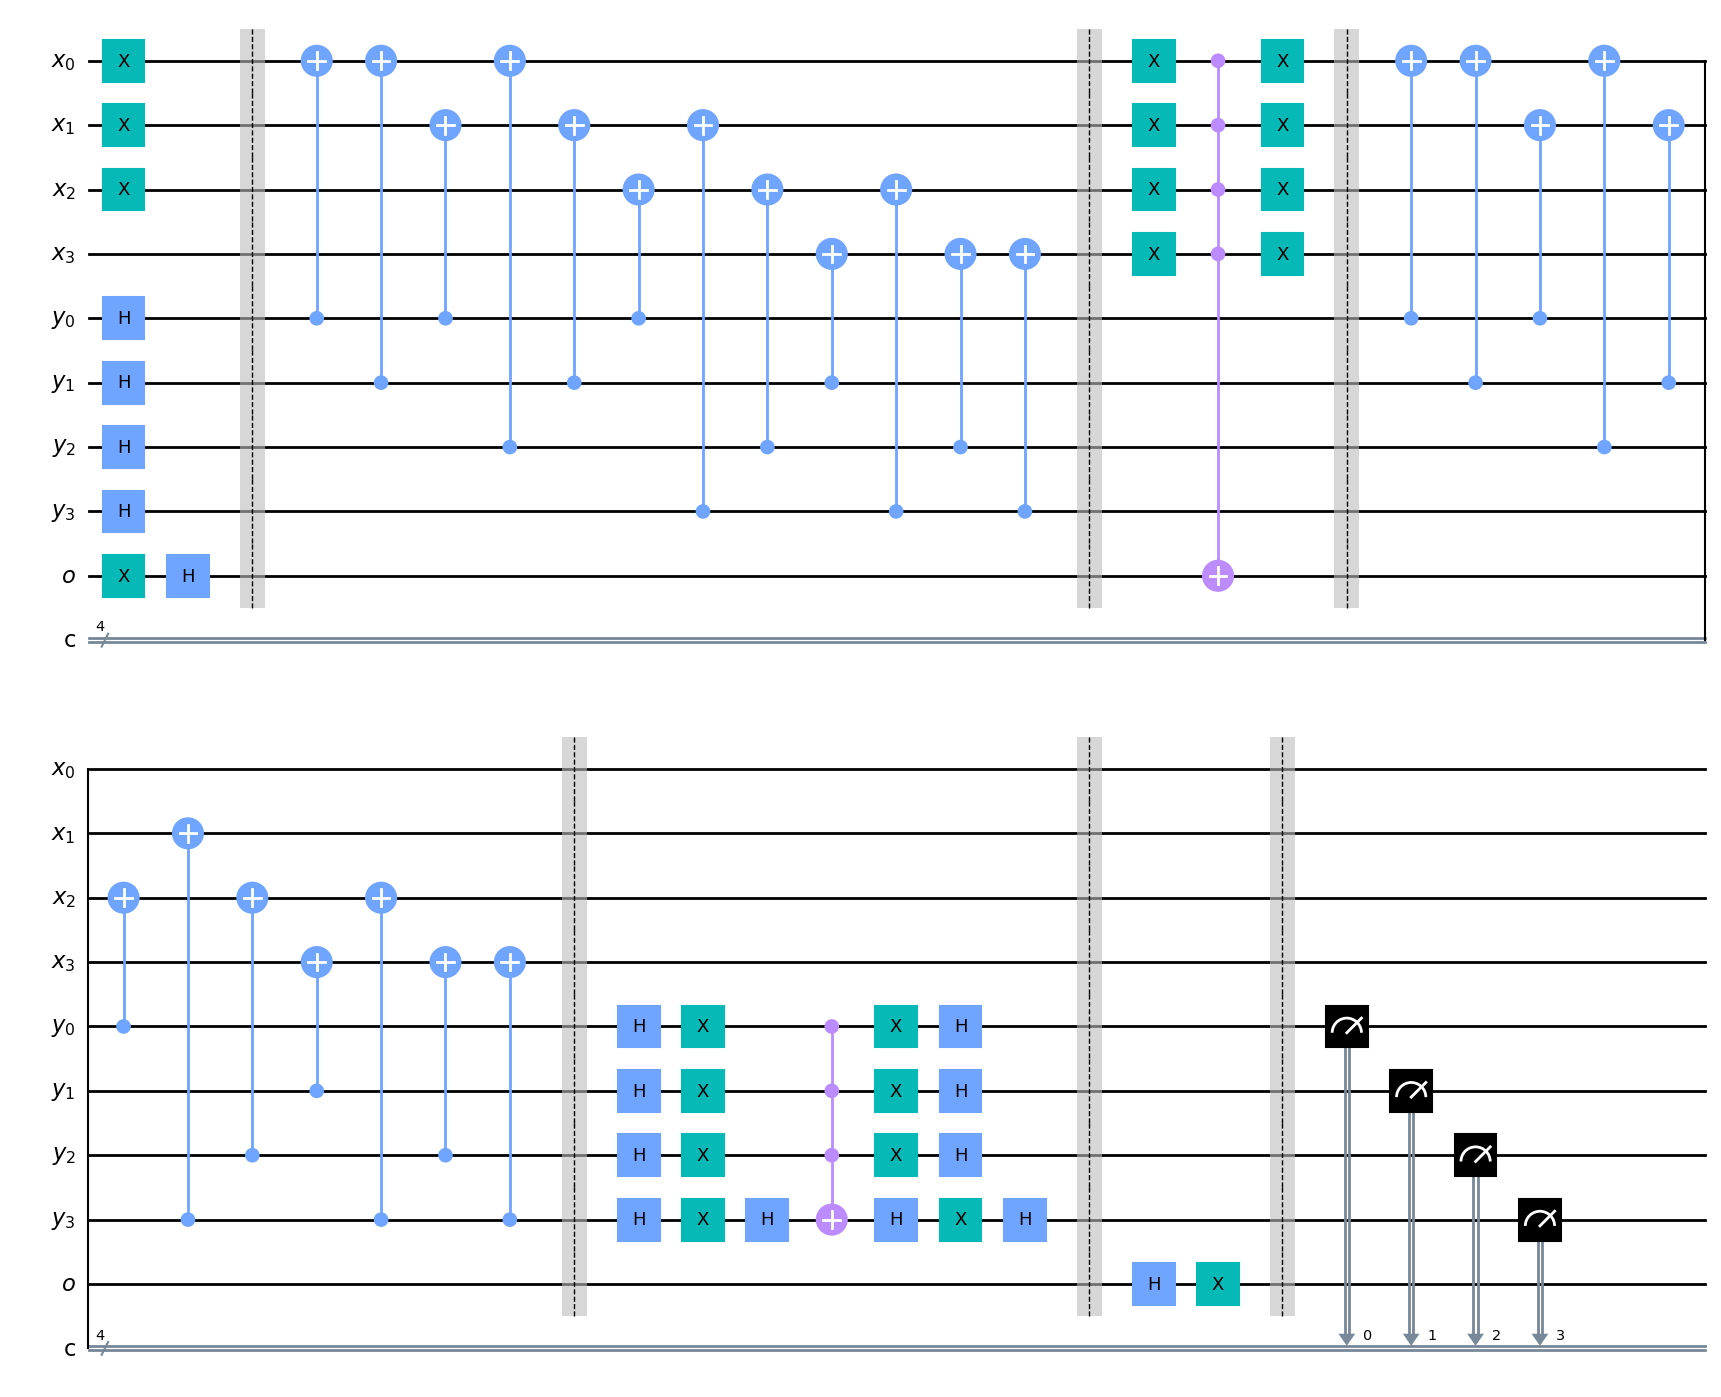

In [5]:
cq = lightsout_cq([1,1,1,0])
#cq = cq.reverse_bits() 
print(cq.draw(output="mpl", style="clifford"))

{'1010': 4, '1100': 6, '1011': 5, '0111': 5, '0011': 5, '0010': 5, '0000': 7, '1111': 10, '0001': 8, '0100': 8, '1110': 9, '1001': 4, '0101': 5, '1000': 933, '0110': 7, '1101': 3}
Figure(640x480)


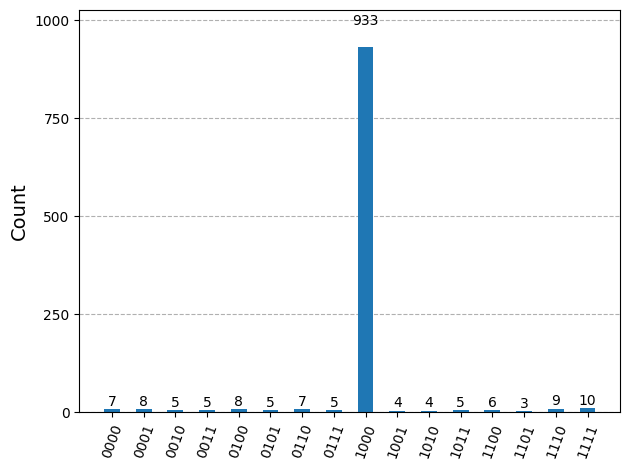

In [5]:
sim = AerSimulator()
job = sim.run(cq, shots = 1024)
results = job.result()
answer = results.get_counts()
print(answer)
print(plot_histogram(answer))

In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="05ec986418f9ff6fe59adea27a05e17c913dcc88e2bf8bfab8dbd5cc17a276b9dc695891a3bac7812f07244659873f765494a22ddacc18035b13b19b44c59ba1", set_as_default=True, overwrite=True)

# Load saved credentials
service = QiskitRuntimeService()

In [8]:
from qiskit import QuantumCircuit
 
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = cq
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
#qc.draw("mpl", style="clifford")

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
 
service = QiskitRuntimeService()

# Run the job locally on a fake backend
fake_backend = FakeBrisbane()
pm = generate_preset_pass_manager(backend=fake_backend, optimization_level=0)
isa_qc = pm.run(qc)

#observables = [I]
#isa_observables = [observable.apply_layout(isa_qc.layout) for observable in observables]

# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)
print(f"Running on backend: {backend}")
 
# Create an Estimator object
#estimator = Estimator(mode=fake_backend)
 
# Submit the circuit to Estimator
#job = estimator.run([(isa_qc, isa_observables)])
#print(f"job id: {job.job_id()}")

# Once the job is complete, get the result
#job.result()[0].data.evs  # expectation values

Running on backend: <IBMBackend('ibm_sherbrooke')>
